## carprice predections

## Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

-Which variables are significant in predicting the price of a car -How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

In [ ]:
Step 1: Reading and Understanding the Data 
Step 2: Visualising the Data 
Step 3: Data Preparation 
Step 4: Splitting the Data into Training and Testing Sets 
Step 5: Building a linear model Step 6: Residual Analysis of the train data 
Step 7: Making Predictions Using the Final Model

## Step 1: Reading and Understanding the Data

In [12]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
cars=pd.read_csv('C:/Users/Lavanya/Desktop/LRA/carprice.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
cars.shape

(205, 26)

In [15]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [16]:
cars['symboling'].astype('category').value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [17]:
cars['aspiration'].astype('category').value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [18]:
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [19]:
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [20]:
round(100*(cars.isnull().sum()/len(cars.index)),2)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [21]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Step 2: Visualising the Data

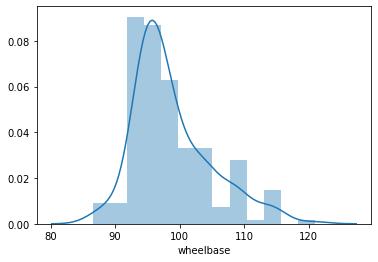

In [22]:
sns.distplot(cars['wheelbase'])
plt.show()

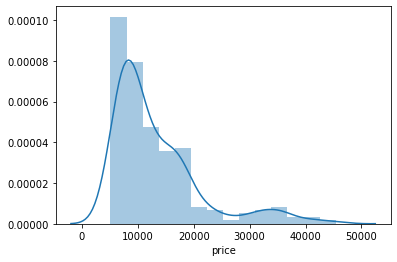

In [23]:
sns.distplot(cars['price'])
plt.show()

<Figure size 1440x720 with 0 Axes>

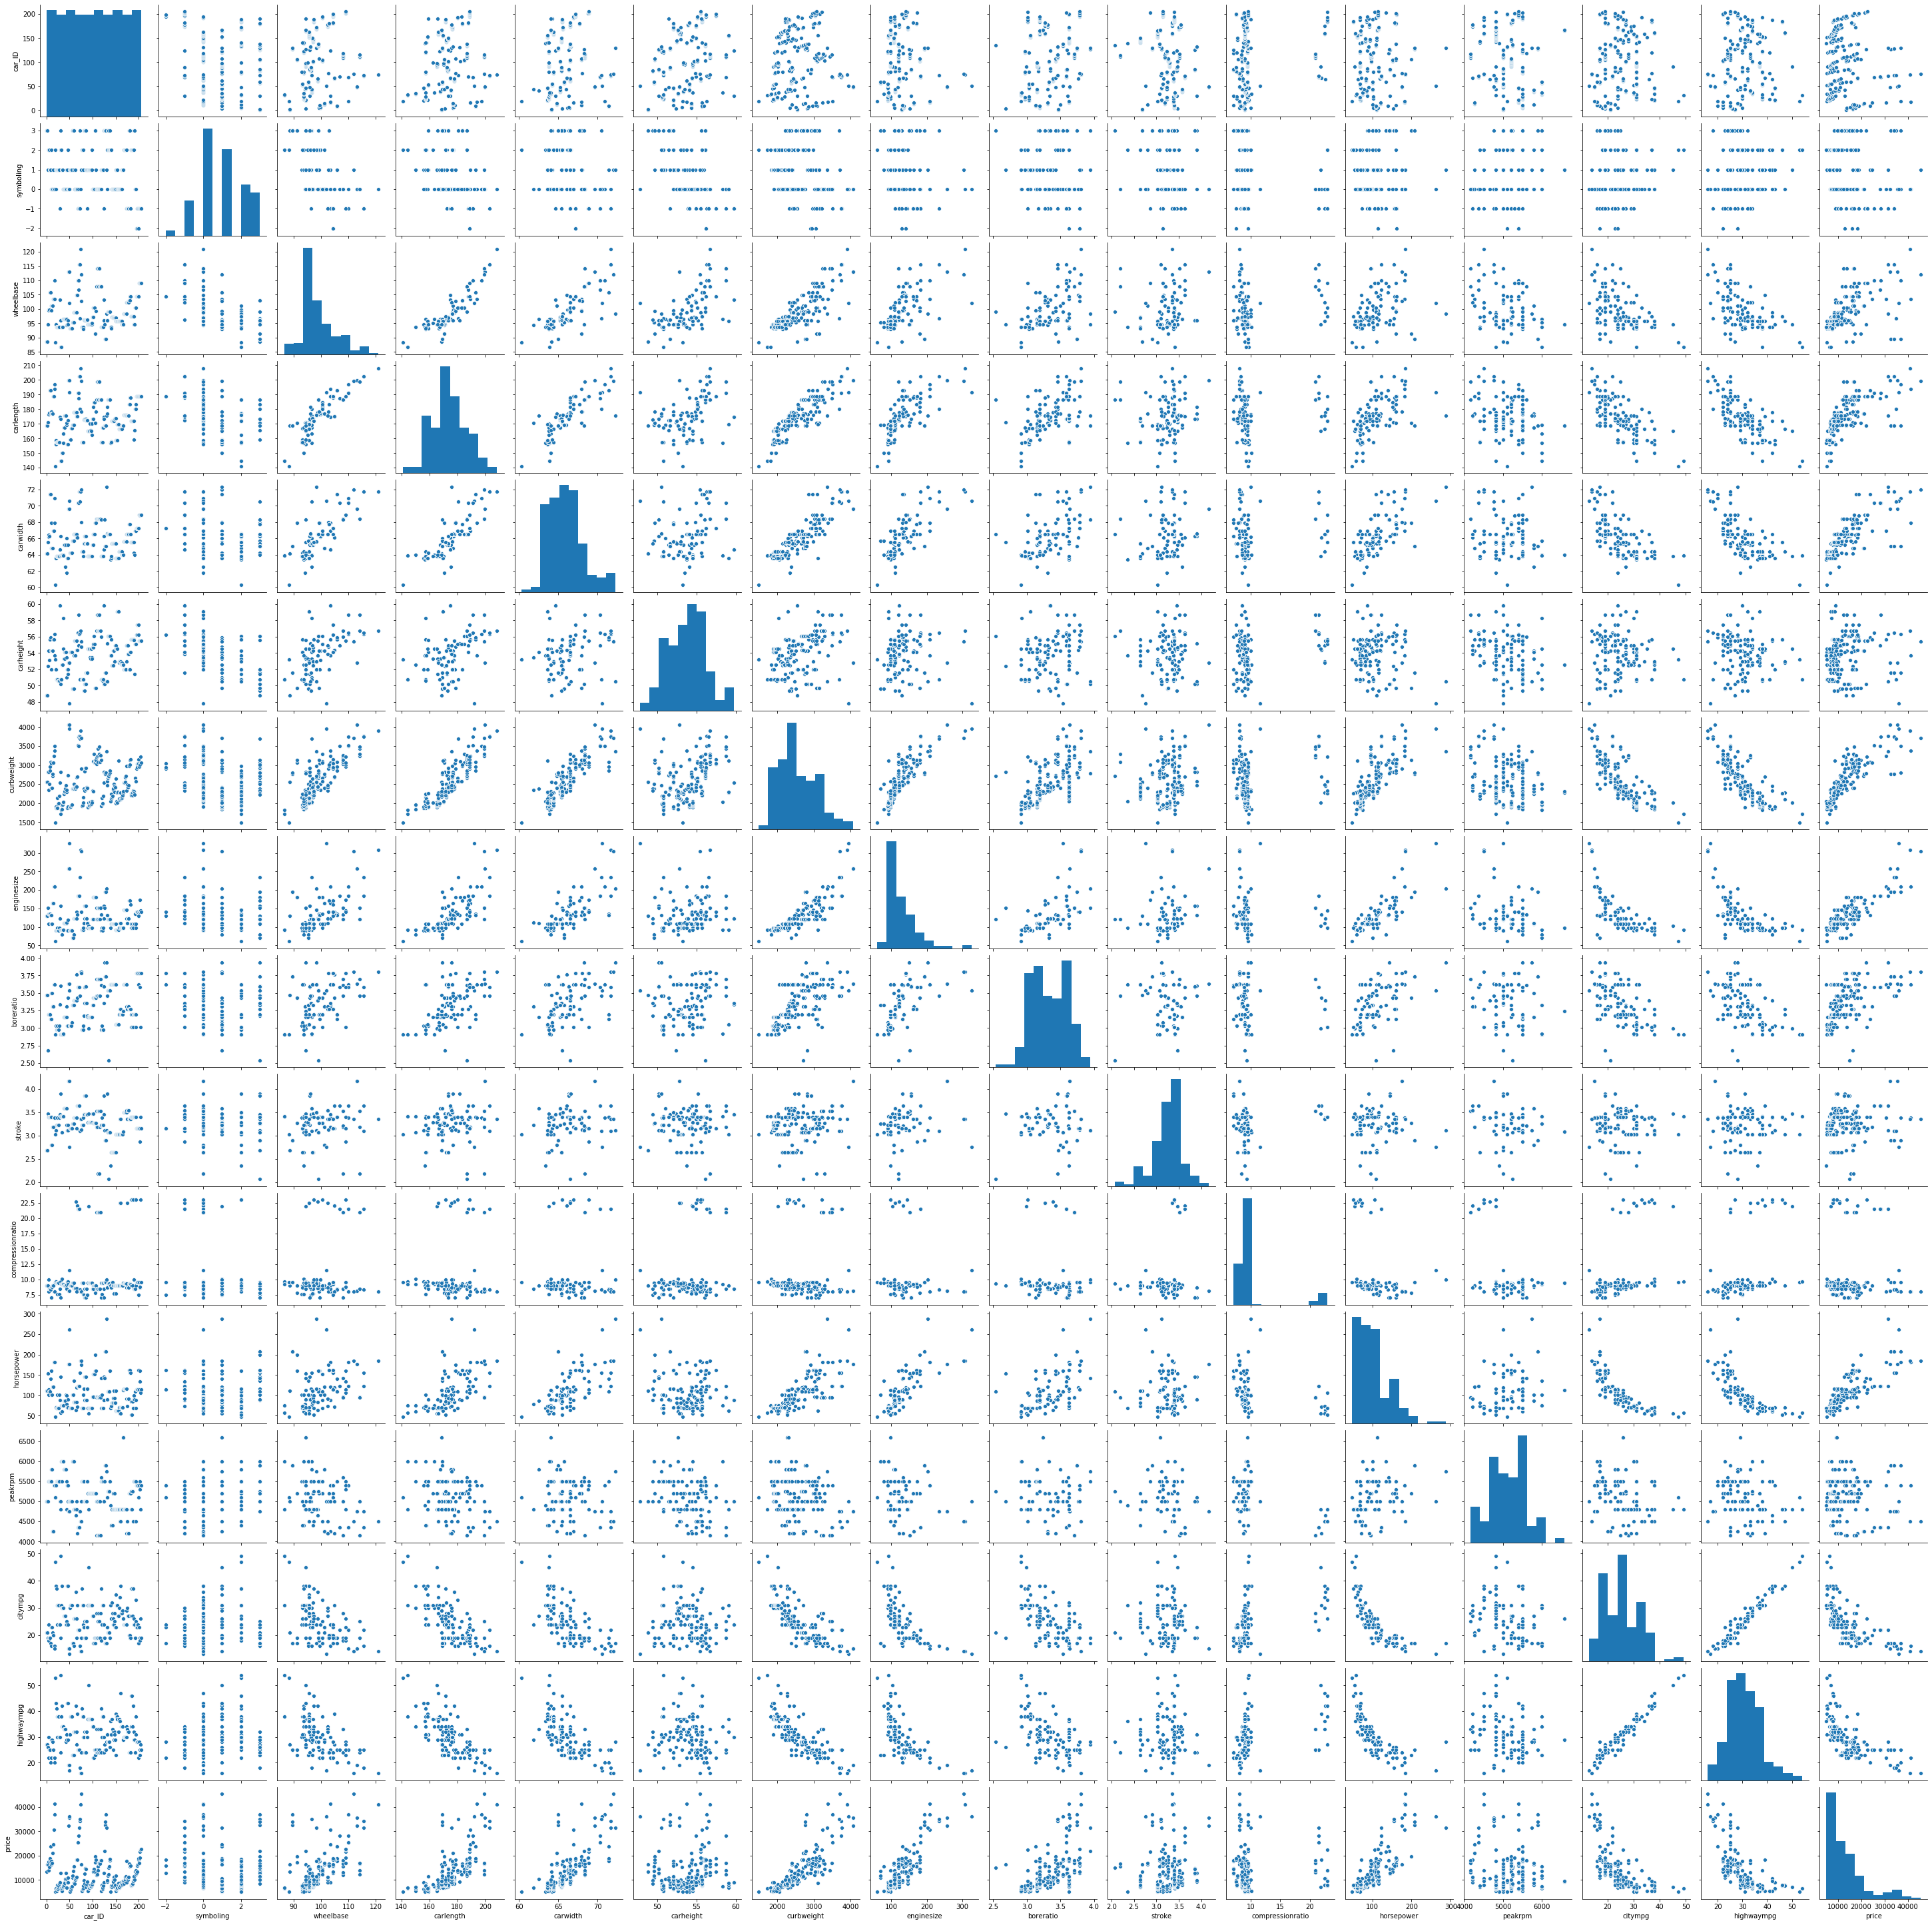

In [24]:
plt.figure(figsize=(20, 10))
sns.pairplot(cars)

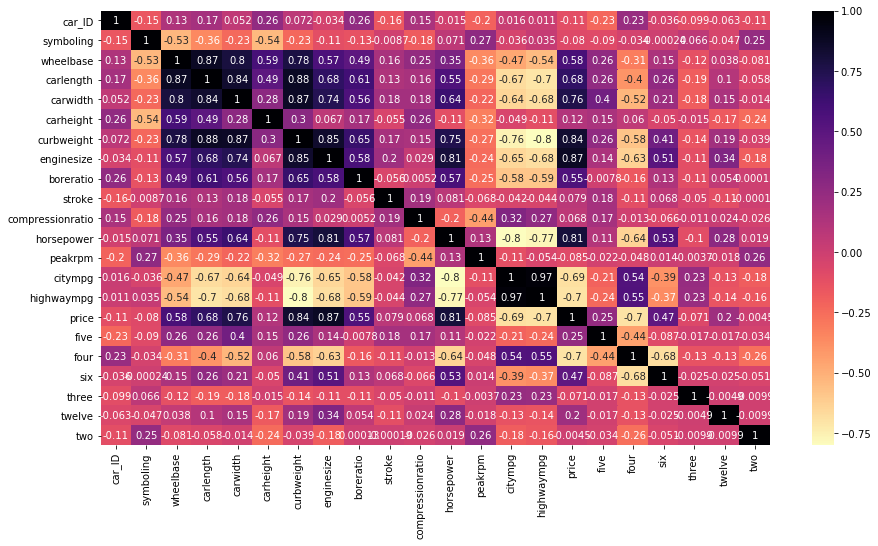

In [28]:
corr=cars.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cmap="magma_r")

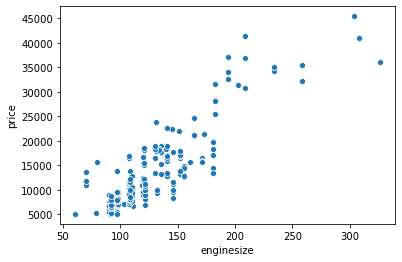

In [29]:
sns.scatterplot(cars['enginesize'],cars['price'])
plt.show()

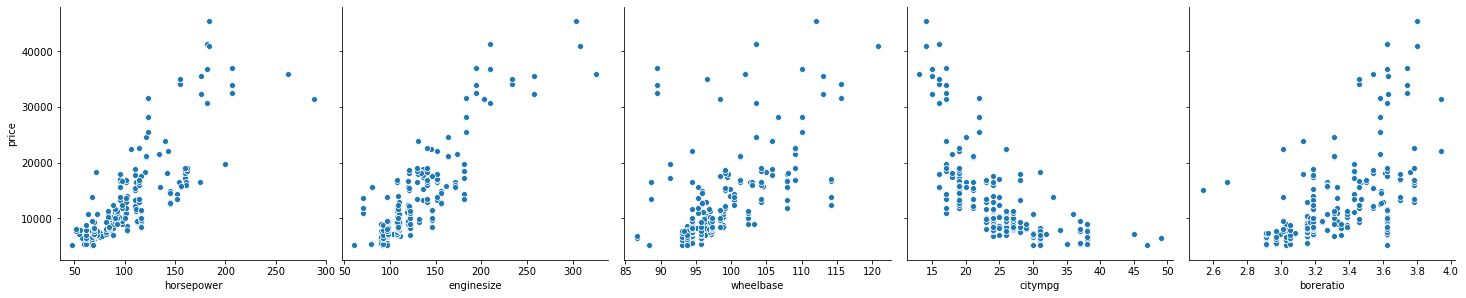

In [30]:
sns.pairplot(cars, x_vars=['horsepower','enginesize','wheelbase','citympg','boreratio'], y_vars='price',size=4, aspect=1, kind='scatter')
plt.show()


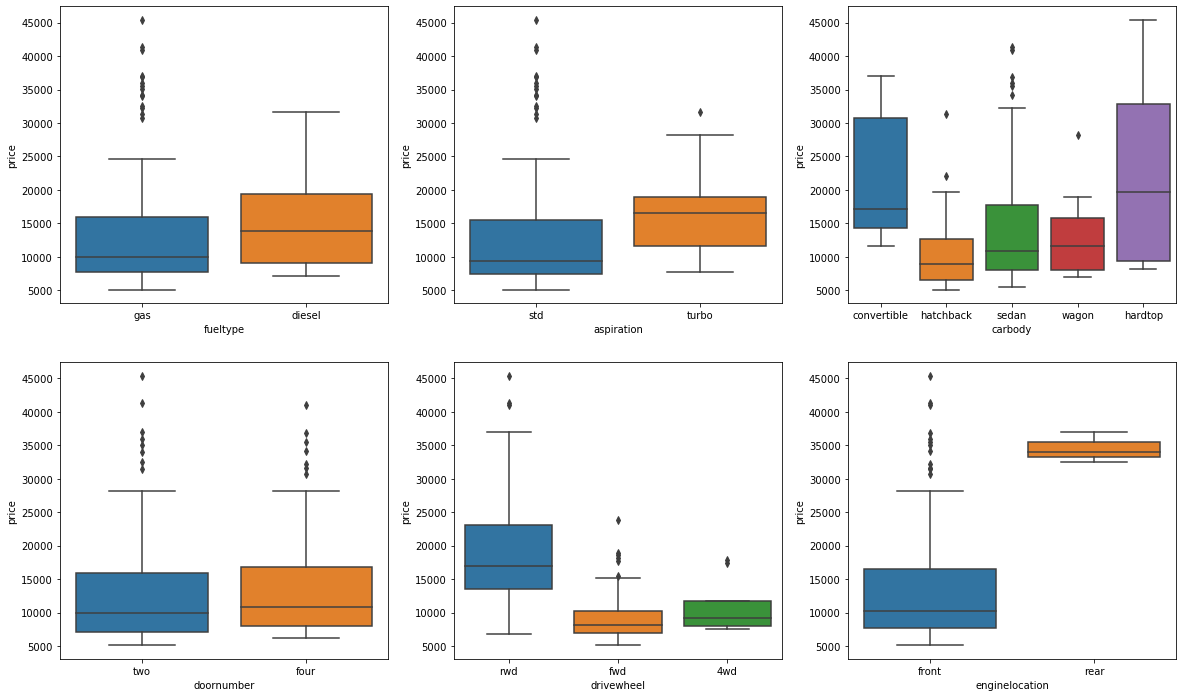

In [31]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = cars)
plt.subplot(2,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = cars)
plt.subplot(2,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = cars)
plt.subplot(2,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = cars)
plt.subplot(2,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = cars)
plt.subplot(2,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars)
plt.show()

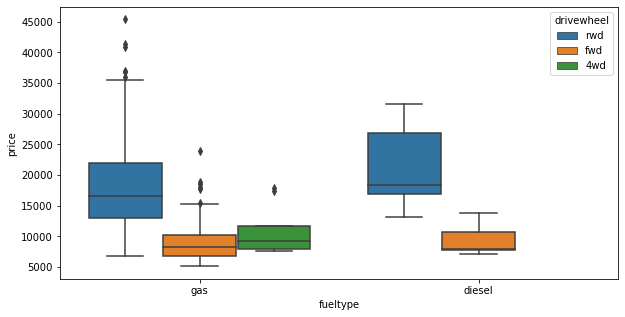

In [32]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'fueltype', y = 'price', hue = 'drivewheel',data = cars)
plt.show()

## Step 3: Data Preparation

In [33]:
carnames = cars['CarName'].apply(lambda x: x.split(" ")[0])
carnames[:10]

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
5           audi
6           audi
7           audi
8           audi
9           audi
Name: CarName, dtype: object

In [34]:
cars['car_company']=carnames
cars['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
maxda           2
vw              2
Nissan          1
porcshce        1
toyouta         1
vokswagen       1
mercury         1
Name: car_company, dtype: int64

In [35]:
cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase','curbweight', 'enginetype',
                'cylindernumber', 'enginesize', 'boreratio','horsepower',  'carlength','carwidth']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,171.2,65.5
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,176.6,66.2
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,176.6,66.4


In [36]:
cars_lr.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           205 non-null    float64
 1   fueltype        205 non-null    object 
 2   aspiration      205 non-null    object 
 3   carbody         205 non-null    object 
 4   drivewheel      205 non-null    object 
 5   wheelbase       205 non-null    float64
 6   curbweight      205 non-null    int64  
 7   enginetype      205 non-null    object 
 8   cylindernumber  205 non-null    object 
 9   enginesize      205 non-null    int64  
 10  boreratio       205 non-null    float64
 11  horsepower      205 non-null    int64  
 12  carlength       205 non-null    float64
 13  carwidth        205 non-null    float64
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


In [37]:
cars_lr.columns

Index(['price', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio',
       'horsepower', 'carlength', 'carwidth'],
      dtype='object')

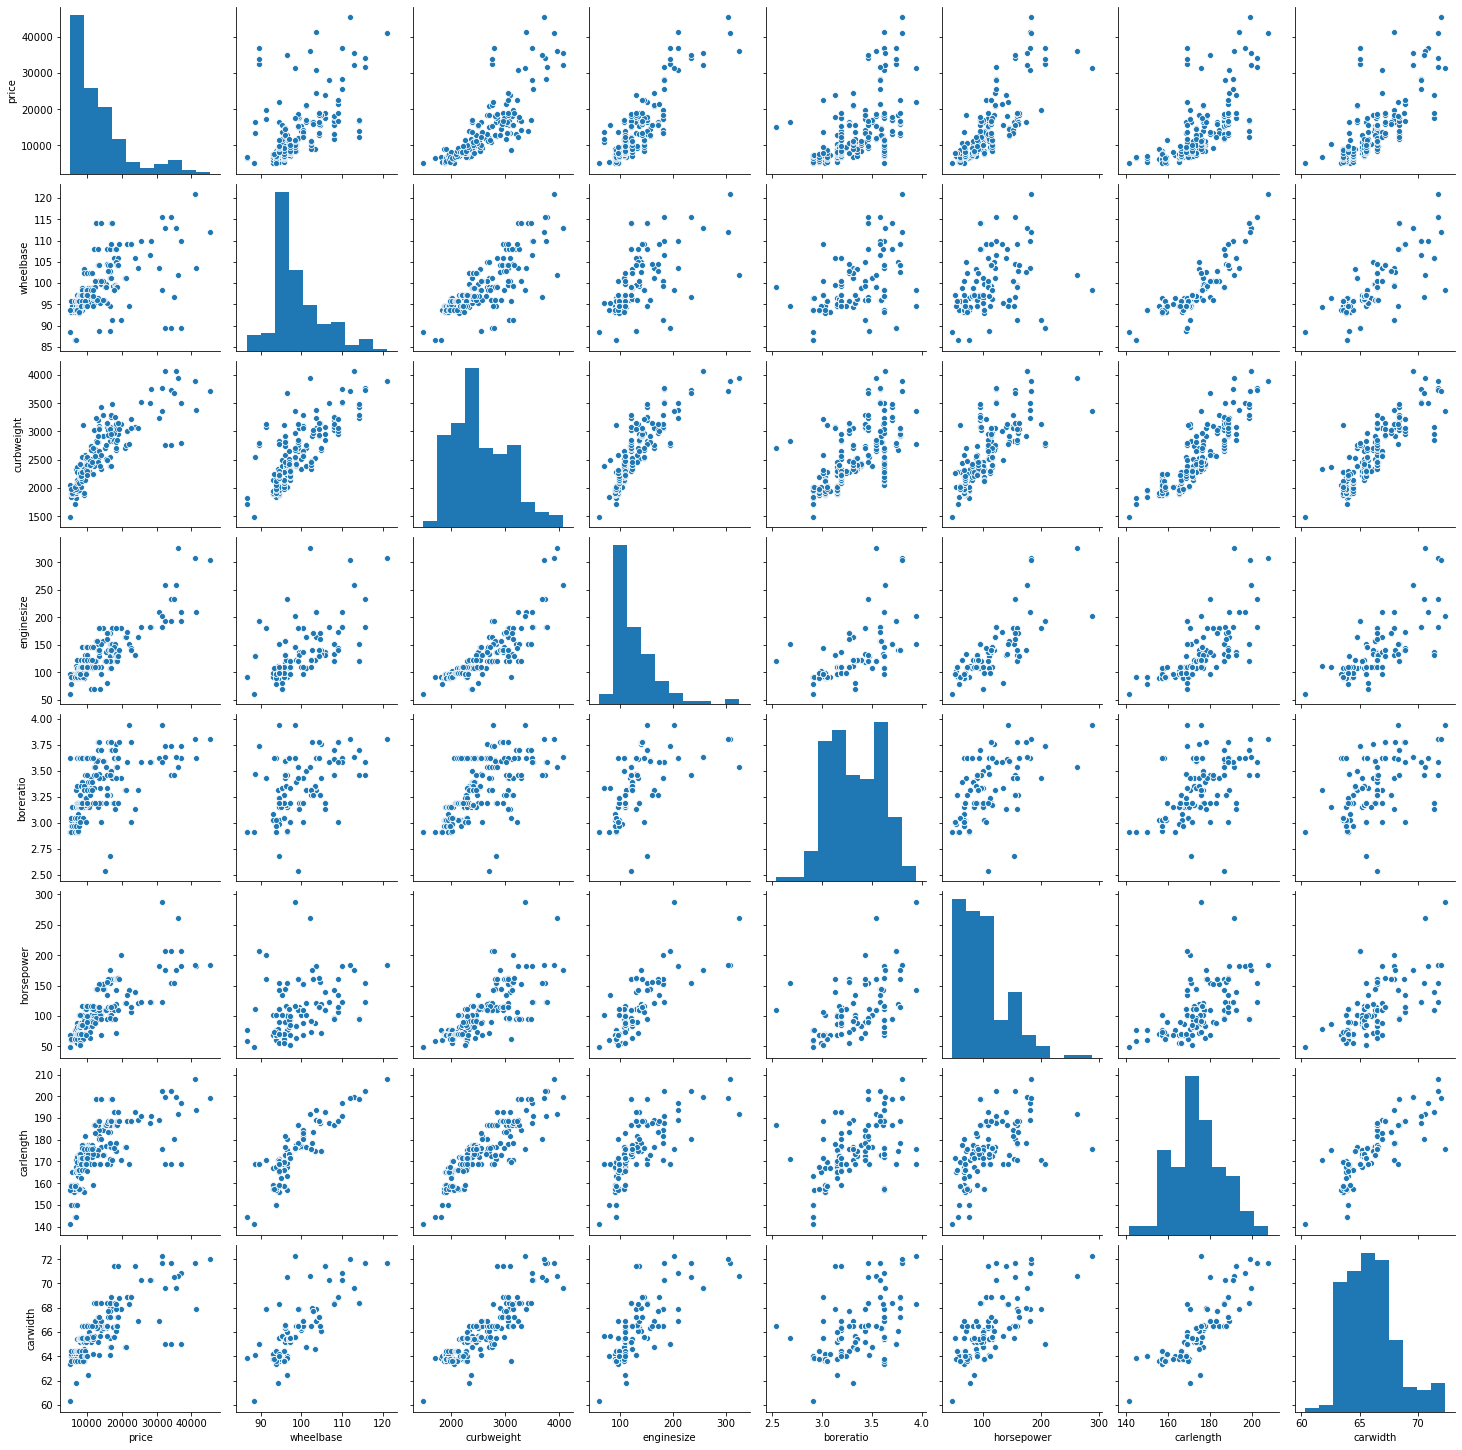

In [38]:
sns.pairplot(cars_lr)
plt.show()

## Dummy variables

In [39]:
status = pd.get_dummies(cars['cylindernumber'])
status.head()

,eight,five,four,six,three,twelve,two
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


In [40]:
status = pd.get_dummies(cars['cylindernumber'], drop_first = True)
cars= pd.concat([cars, status], axis = 1)
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,three,twelve,two,car_company,five,four,six,three,twelve,two
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,0,0,0,alfa-romero,0,1,0,0,0,0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,0,0,0,alfa-romero,0,1,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,0,0,0,alfa-romero,0,0,1,0,0,0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,0,0,0,audi,0,1,0,0,0,0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,0,0,0,audi,1,0,0,0,0,0


## Train_Test spliting and feature selection

In [41]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [42]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price'] 
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [43]:
df_train.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth
122,0.068818,gas,std,sedan,fwd,0.244828,0.272692,ohc,four,0.139623,0.230159,0.083333,0.426016,0.291667
125,0.466890,gas,std,hatchback,rwd,0.272414,0.500388,ohc,four,0.339623,1.000000,0.395833,0.452033,0.666667
166,0.122110,gas,std,hatchback,rwd,0.272414,0.314973,dohc,four,0.139623,0.444444,0.266667,0.448780,0.308333
1,0.314446,gas,std,convertible,rwd,0.068966,0.411171,dohc,four,0.260377,0.626984,0.262500,0.450407,0.316667
199,0.382131,gas,turbo,wagon,rwd,0.610345,0.647401,ohc,four,0.260377,0.746032,0.475000,0.775610,0.575000


In [44]:
df_train.describe()


,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219310,0.411141,0.407878,0.241351,0.497946,0.227302,0.525476,0.461655
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.204848,0.184517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.399187,0.304167
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.502439,0.425000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.669919,0.550000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


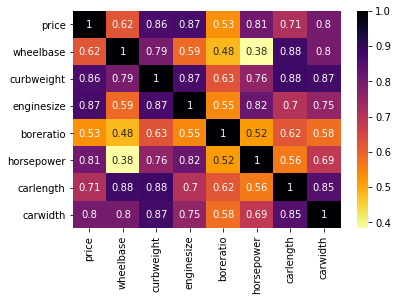

In [45]:
plt.figure.Figsize =(30, 10)
sns.heatmap(df_train.corr(), annot = True, cmap="inferno_r")


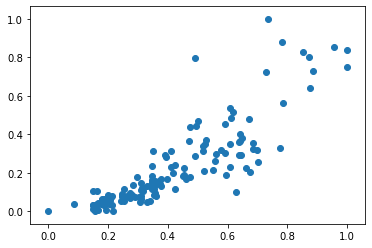

In [46]:
plt.figure.figsize=[6,6]
plt.scatter(df_train.curbweight, df_train.price)
plt.show()

In [47]:
y_train = df_train.pop('price')
X_train = df_train

## Model building

In [48]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train[['curbweight']])
lr = sm.OLS(y_train, X_train_lm).fit()

In [49]:
lr.params

const        -0.139568
curbweight    0.879863
dtype: float64

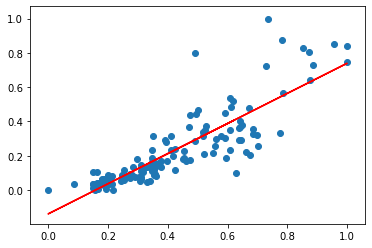

In [50]:
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], -0.1395+0.879*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [51]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     407.2
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           2.06e-43
Time:                        07:20:24   Log-Likelihood:                 114.04
No. Observations:                 143   AIC:                            -224.1
Df Residuals:                     141   BIC:                            -218.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1396      0.020     -6.974      0.0

In [52]:
x_train_lm = X_train[['enginesize', 'curbweight']]
 

In [53]:
x_train_lm = sm.add_constant(x_train_lm) 
lr = sm.OLS(y_train, x_train_lm).fit() 
lr.params

const        -0.128113
enginesize    0.678162
curbweight    0.450496
dtype: float64

In [54]:
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     284.0
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           5.31e-50
Time:                        07:20:27   Log-Likelihood:                 132.84
No. Observations:                 143   AIC:                            -259.7
Df Residuals:                     140   BIC:                            -250.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1281      0.018     -7.239      0.0

In [55]:
x_train_lm = X_train[['enginesize', 'curbweight','wheelbase']]
 

In [56]:
import statsmodels.api as sm
x_train_lm = sm.add_constant(x_train_lm) 
lr = sm.OLS(y_train, x_train_lm).fit() 
lr.params


const        -0.124411
enginesize    0.656489
curbweight    0.496748
wheelbase    -0.042165
dtype: float64

In [57]:
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     188.6
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           8.39e-49
Time:                        07:20:29   Log-Likelihood:                 133.03
No. Observations:                 143   AIC:                            -258.1
Df Residuals:                     139   BIC:                            -246.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1244      0.019     -6.644      0.0

In [80]:
x_train_lm = X_train[['enginesize', 'curbweight','wheelbase']]


In [81]:
import statsmodels.api as sm
x_train_lm = sm.add_constant(x_train_lm) 
lr = sm.OLS(y_train, x_train_lm).fit() 
lr.params


const        -0.124411
enginesize    0.656489
curbweight    0.496748
wheelbase    -0.042165
dtype: float64

In [82]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     188.6
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           8.39e-49
Time:                        07:26:47   Log-Likelihood:                 133.03
No. Observations:                 143   AIC:                            -258.1
Df Residuals:                     139   BIC:                            -246.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1244      0.019     -6.644      0.0

In [83]:
X_train.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth
122,gas,std,sedan,fwd,0.244828,0.272692,ohc,four,0.139623,0.230159,0.083333,0.426016,0.291667
125,gas,std,hatchback,rwd,0.272414,0.500388,ohc,four,0.339623,1.000000,0.395833,0.452033,0.666667
166,gas,std,hatchback,rwd,0.272414,0.314973,dohc,four,0.139623,0.444444,0.266667,0.448780,0.308333
1,gas,std,convertible,rwd,0.068966,0.411171,dohc,four,0.260377,0.626984,0.262500,0.450407,0.316667
199,gas,turbo,wagon,rwd,0.610345,0.647401,ohc,four,0.260377,0.746032,0.475000,0.775610,0.575000


## Check VIF

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
x_train_lma = X_train[['enginesize','horsepower']]


In [88]:
X_train_lm = sm.add_constant(x_train_lma) 
lr_a = sm.OLS(y_train, X_train_lm).fit()


In [89]:
lr_a.params


const        -0.078951
enginesize    0.878745
horsepower    0.379117
dtype: float64

In [90]:
print(lr_a.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     250.1
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           6.17e-47
Time:                        07:29:03   Log-Likelihood:                 125.63
No. Observations:                 143   AIC:                            -245.3
Df Residuals:                     140   BIC:                            -236.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0790      0.016     -4.981      0.0

In [92]:
vif = pd.DataFrame() 
vif['Features'] = x_train_lma.columns 
vif['VIF'] = [variance_inflation_factor(x_train_lma.values, i) for i in range(x_train_lma.shape[1])] 
vif['VIF'] = round(vif['VIF'], 2) 
vif = vif.sort_values(by = "VIF", ascending = False) 
vif


,Features,VIF
0,enginesize,8.69
1,horsepower,8.69


In [93]:
lm = sm.OLS(y_train,X_train_lm).fit()


In [94]:
y_train_price = lr_a.predict(X_train_lm)


Text(0.5, 0, 'Errors')

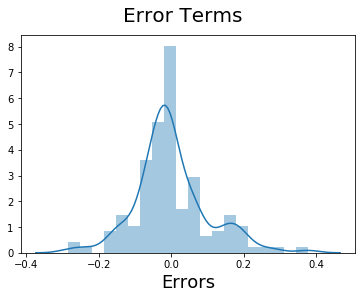

In [95]:
fig = plt.figure() 
sns.distplot((y_train - y_train_price), bins = 20) 
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [98]:
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price'] 
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [99]:
df_test.describe()


,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.209644,0.370121,0.371743,0.228835,0.667691,0.359521,0.486741,0.375212
std,0.210911,0.179970,0.222354,0.188416,0.228484,0.252970,0.183964,0.208977
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076536,0.265306,0.219125,0.126638,0.515873,0.140323,0.389764,0.221053
50%,0.136847,0.327988,0.344065,0.183406,0.674603,0.312903,0.475591,0.326316
75%,0.280049,0.482507,0.540726,0.287118,0.857143,0.432258,0.642126,0.421053
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
y_test = df_test.pop('price') 
X_test = df_test


In [101]:
X_train_new = X_train_lm.drop('const',axis=1) 
X_test_new = X_test[X_train_new.columns]  
X_test_new = sm.add_constant(X_test_new)


In [102]:
y_pred = lm.predict(X_test_new)


In [103]:
from sklearn.metrics import r2_score  
r2_score(y_test, y_pred)


0.6910707507601941

Text(0, 0.5, 'y_pred')

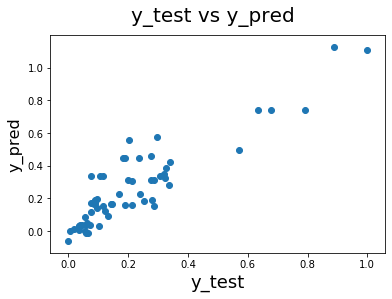

In [104]:
fig = plt.figure() 
plt.scatter(y_test,y_pred) 
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label 
plt.ylabel('y_pred', fontsize=16)  

In [105]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     250.1
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           6.17e-47
Time:                        07:36:37   Log-Likelihood:                 125.63
No. Observations:                 143   AIC:                            -245.3
Df Residuals:                     140   BIC:                            -236.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0790      0.016     -4.981      0.0

Inference : R-sqaured and Adjusted R-squared (extent of fit) - 0.781 and 0.778 - 78%variance explained. 
confidence level-[]
Fstats and Prob(F-stats) (overall model fit) - 250.1 and 6.17e-47(approx. 0.0) - Model is significant and explained 78% variance.
p-values - p-values for all the coefficients seem to be less than the significance level of 0.05.
meaning that all the predictors are statistically significant.
 